In [1]:
import os, time
import torch
import torch.nn.functional as F
import numpy as np
import json
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.transform
import argparse
import imageio.v2 as imageio
from PIL import Image

from transformer_inference import caption_image_beam_search, visualize_att


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [3]:
args = argparse.Namespace(img='example_images/cat.png', 
                          checkpoint='checkpoints/transformer_model_checkpoints/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar', 
                          word_map='checkpoints/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json', 
                          decoder_mode='transformer', 
                          save_img_dir='./caption', 
                          beam_size=5, 
                          smooth=True)

## Load the model and word_map


In [4]:
start = time.time()

checkpoint = torch.load(args.checkpoint, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

with open(args.word_map, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word


## Inference

In [5]:
img_path = 'example_images/cat.png'

In [6]:
with torch.inference_mode():
    seq, alphas = caption_image_beam_search(args, encoder, decoder, args.img, word_map, device)
    alphas = torch.FloatTensor(alphas)

caption = ''
for s in seq[1:-1]:
    caption += rev_word_map[s] + ' '
print(caption)

a cat laying on top of a bed 


## Attention

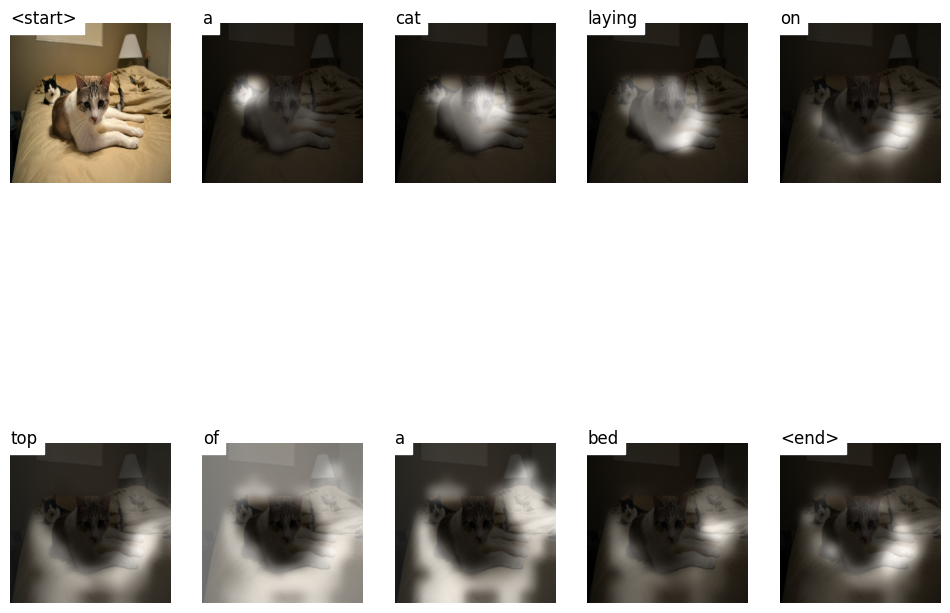

In [7]:
visualize_att(args.img, seq, alphas, rev_word_map, args.smooth)